In [ ]:
'''
L'évolution des températures est-elle corrélée aux émissions des gaz à effet de serre ?

Les objectifs de cette partie sont :
- d'analyser la relation entre ces variables,
- de la modéliser afin d'en mesurer la pertinence.

'''

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# Dataset

df = pd.read_csv('df_chgm_clmt.csv')
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S,CH[4],CO[2],N[2]*O
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,-0.16,-0.09,-0.04,0.05,0.66,109.839826,7897.383133,1.846730
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,0.09,0.12,-0.05,-0.07,0.58,111.086810,7947.907705,1.867070
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,-0.06,-0.03,0.01,0.04,0.61,112.358353,8171.126698,1.884569
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,-0.18,-0.14,-0.04,0.07,0.49,113.742016,8411.151301,1.899797
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,-0.13,-0.15,-0.19,-0.02,0.64,114.611282,8472.981793,1.913325


In [ ]:
'''
Corrélations
'''

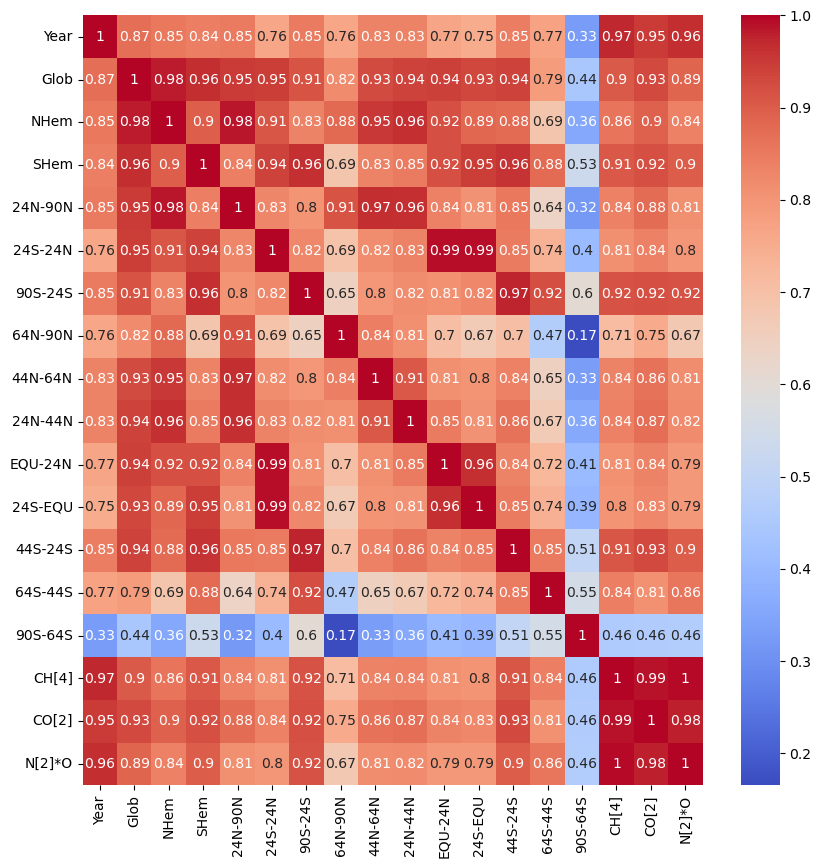

In [6]:
'''Affichage d'une heatmap des corrélations du DataFrame'''

cor = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

In [ ]:
'''
La heatmap permet de repérer visuellement les degrés de corrélations entre les différentes variables du DataFrame. 
Nous pouvons déjà observer :
- une tres forte corrélation entre les émissions de gaz à effet de serre et les années.
- une forte corrélation entre les émissions de gaz à effet de serre et les températures globales.
- une faible corrélation entre les émissions de gaz à effet de serre et l'Antarctique.
'''

In [ ]:
'''
Détermination des coefficents de corrélation entre les variables à l'aide du test statistique de Pearson
'''

In [22]:
from scipy.stats import pearsonr

print('Coefficient de Pearson entre les années et le CH4 :', pearsonr(df['Year'], df['CH[4]']))
print('Coefficient de Pearson entre les années et le CO2 :', pearsonr(df['Year'], df['CO[2]']))
print('Coefficient de Pearson entre les années et le N2O :', pearsonr(df['Year'], df['N[2]*O']))

Coefficient de Pearson entre les années et le CH4 : PearsonRResult(statistic=0.9707547784544609, pvalue=1.2272397357693349e-88)
Coefficient de Pearson entre les années et le CO2 : PearsonRResult(statistic=0.9504894747459739, pvalue=6.147620287468507e-73)
Coefficient de Pearson entre les années et le N2O : PearsonRResult(statistic=0.9644062848871139, pvalue=9.245604688091418e-83)


In [23]:
print('Coefficient de Pearson entre les températures globales et le CH4 :', pearsonr(df['Glob'], df['CH[4]']))
print('Coefficient de Pearson entre les températures globales et le CO2 :', pearsonr(df['Glob'], df['CO[2]']))
print('Coefficient de Pearson entre les températures globales et le N2O :', pearsonr(df['Glob'], df['N[2]*O']))

Coefficient de Pearson entre les températures globales et le CH4 : PearsonRResult(statistic=0.9040246528721525, pvalue=1.5830591162177431e-53)
Coefficient de Pearson entre les températures globales et le CO2 : PearsonRResult(statistic=0.9293441474570596, pvalue=1.8988539068233e-62)
Coefficient de Pearson entre les températures globales et le N2O : PearsonRResult(statistic=0.8866799166618878, pvalue=9.54692811966642e-49)


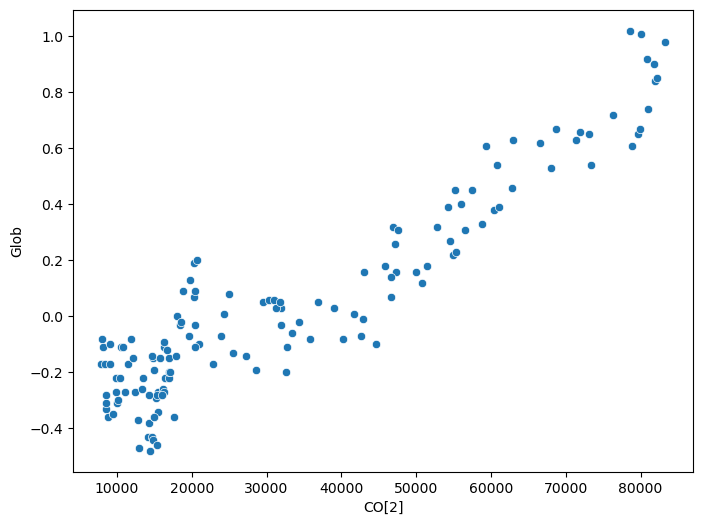

In [28]:
'''
Etude de la relation entre les émissions de CO2 et les températures - Visualisation à l'aide d'un scatterplot
'''

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x="CO[2]", y="Glob", ax=ax);

In [ ]:
'''
Cette représentation graphique confirme la forte corrélation entre les deux variables, comme vu précédemment grâce aux tests
statistiques.
'''

-0.43317092670845847 0.01987704915574204
r^2: 0.8636805444126892




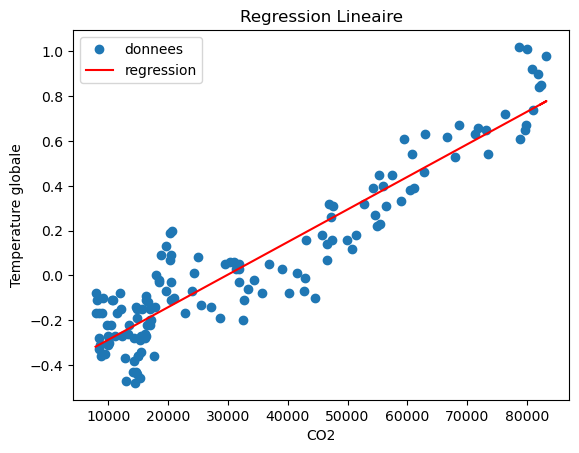

In [69]:
''' Visualisation de la regression lineaire entre les temperatures globales et le CO2 '''

X = df['CO[2]']
Y = df['Glob']

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

result = stats.linregress(X, Y)
print(result.intercept, result.intercept_stderr)
print("r^2:", r_value**2)

'''
intercept : valeur de Y lorsque X = 0
slope : coefficient de la pente de la régression
'''

print('\n')

plt.plot(X, Y, 'o', label='donnees')
plt.plot(X, intercept + slope*X, 'r', label='regression')

plt.xlabel("CO2") 
plt.ylabel("Temperature globale") 
plt.title("Regression Lineaire")
plt.legend()

plt.show();

-0.505308045952554 0.025900310326113198
r^2: 0.8172605730006153




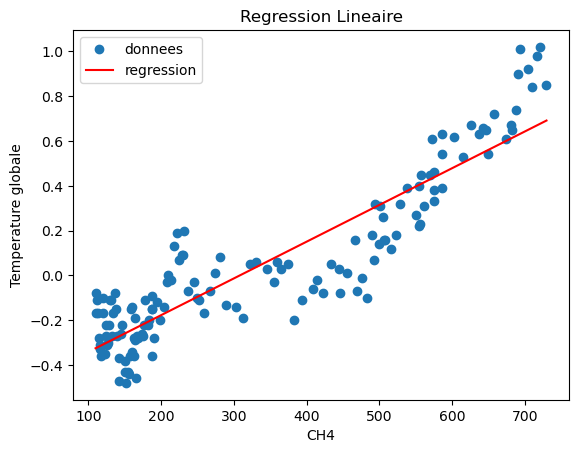

In [70]:
''' Visualisation de la regression lineaire entre les temperatures globales et le CH4 '''

X = df['CH[4]']
Y = df['Glob']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

result = stats.linregress(X, Y)
print(result.intercept, result.intercept_stderr)
print("r^2:", r_value**2)

print('\n')

plt.plot(X, Y, 'o', label='donnees')
plt.plot(X, intercept + slope*X, 'r', label='regression')

plt.xlabel("CH4") 
plt.ylabel("Temperature globale") 
plt.title("Regression Lineaire")
plt.legend()

plt.show();

-0.3812805680472149 0.023832982540691716
r^2: 0.7862012746115328




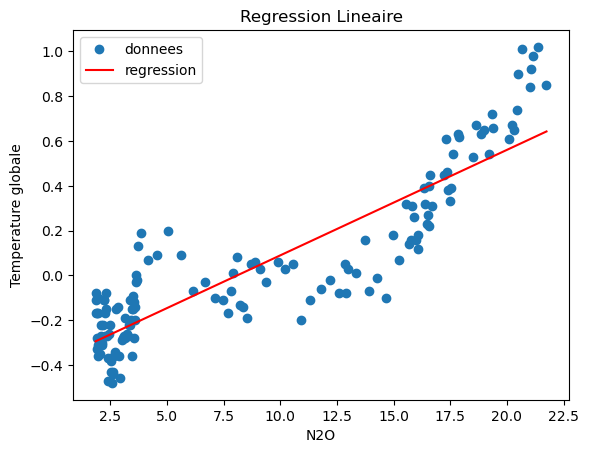

In [71]:
''' Visualisation de la regression lineaire entre les temperatures globales et le N2O '''

X = df['N[2]*O']
Y = df['Glob']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

result = stats.linregress(X, Y)
print(result.intercept, result.intercept_stderr)
print("r^2:", r_value**2)

print('\n')

plt.plot(X, Y, 'o', label='donnees')
plt.plot(X, intercept + slope*X, 'r', label='regression')

plt.xlabel("N2O") 
plt.ylabel("Temperature globale") 
plt.title("Regression Lineaire")
plt.legend()

plt.show();

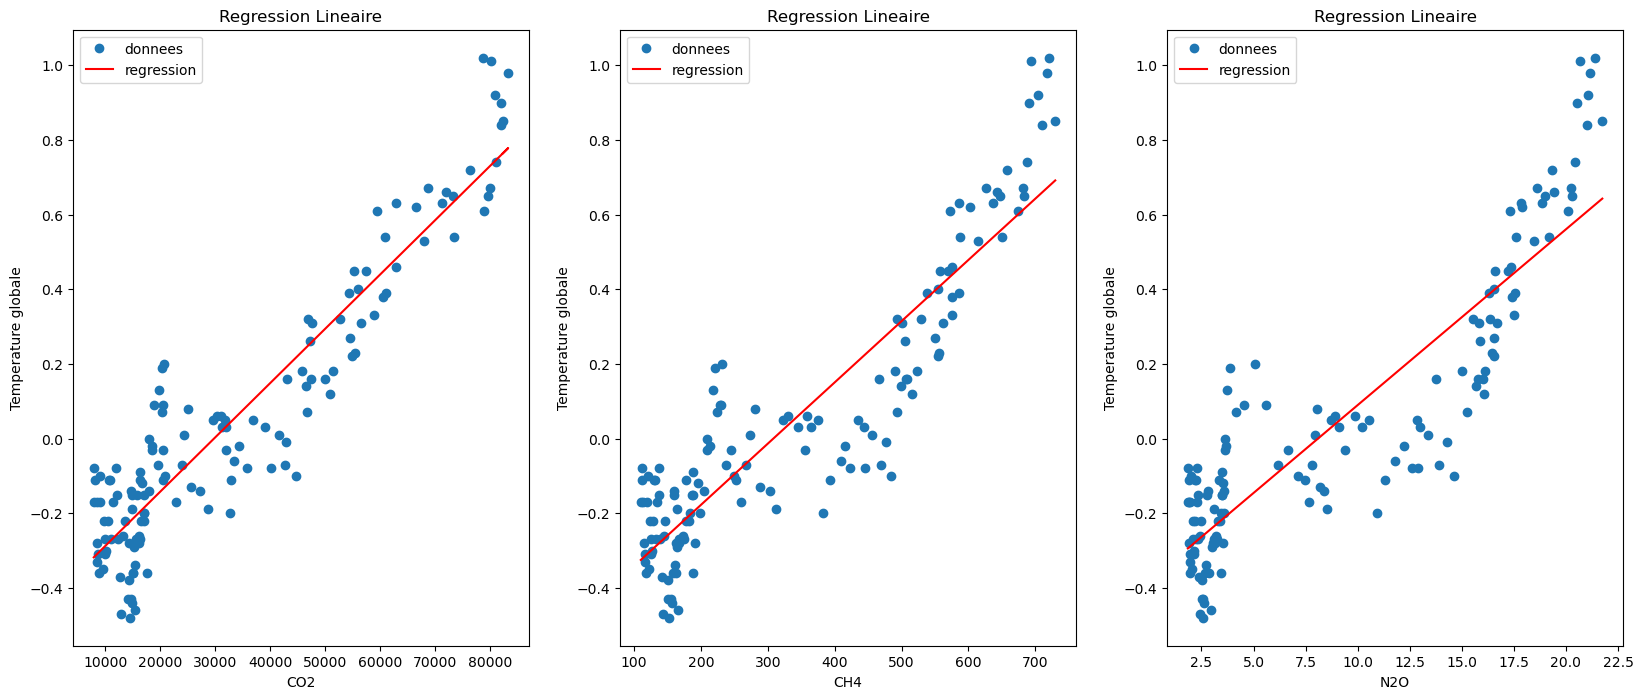

In [75]:
# Affichage sur un meme plan

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)

X1 = df['CO[2]']
Y1 = df['Glob']

slope, intercept, r_value, p_value, std_err = stats.linregress(X1, Y1)

plt.plot(X1, Y1, 'o', label='donnees')
plt.plot(X1, intercept + slope*X1, 'r', label='regression')

plt.xlabel("CO2") 
plt.ylabel("Temperature globale") 
plt.title("Regression Lineaire")
plt.legend()


plt.subplot(1, 3, 2)


X2 = df['CH[4]']
Y2 = df['Glob']

slope, intercept, r_value, p_value, std_err = stats.linregress(X2, Y2)

plt.plot(X2, Y2, 'o', label='donnees')
plt.plot(X2, intercept + slope*X2, 'r', label='regression')

plt.xlabel("CH4") 
plt.ylabel("Temperature globale") 
plt.title("Regression Lineaire")
plt.legend()


plt.subplot(1, 3, 3)

X3 = df['N[2]*O']
Y3 = df['Glob']

slope, intercept, r_value, p_value, std_err = stats.linregress(X3, Y3)


plt.plot(X3, Y3, 'o', label='donnees')
plt.plot(X3, intercept + slope*X3, 'r', label='regression')

plt.xlabel("N2O") 
plt.ylabel("Temperature globale") 
plt.title("Regression Lineaire")
plt.legend()

plt.show();


In [ ]:
'''
Conclusion :
La hausse des températures est très fortement liée à celle des émissions de CO2.
'''